In [1]:
!pip install folium

In [2]:
import re
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [3]:
file_path = 'C:\\Users\\gasso\\Dropbox\\Olivia\\Airline Application\\Delta CJO\\Bid Analysis\\2024-12\\A220 Bid List Dec 24 pdfplumber.txt'  # Specify the input text file path
# Function to find all groups of three capitalized letters in lines starting with a number
def find_capitalized_groups_in_numbered_lines(file_path):
    capitalized_groups = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line starts with a number
            if line.lstrip().startswith(tuple(str(i) for i in range(10))):  # Check for any digit 0-9
                # Find groups of three capitalized letters in the line
                groups = re.findall(r'\b[A-Z]{3}\b', line)
                capitalized_groups.extend(groups)
    
    return capitalized_groups

# Example usage
capitalized_groups = find_capitalized_groups_in_numbered_lines(file_path)
print(capitalized_groups)

['SEA', 'DEC', 'SEA', 'DEN', 'DEN', 'SLC', 'SLC', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'SLC', 'SLC', 'SEA', 'SEA', 'DEC', 'SEA', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'CHS', 'CHS', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'DEC', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'ORD', 'ORD', 'SEA', 'SEA', 'DEC', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'OAK', 'SFO', 'SLC', 'SLC', 'DFW', 'DFW', 'LGA', 'LGA', 'ORD', 'ORD', 'SEA', 'SEA', 'DEC', 'SEA', 'SNA', 'SNA'

In [4]:
# Function to find all groups of three capitalized letters in lines NOT starting with a number,
# checking only the first three characters for capitalization and ensuring they are not part of a longer word
def find_capitalized_groups_in_skipped_lines(file_path):
    capitalized_groups = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line does NOT start with a number
            if not line.lstrip().startswith(tuple(str(i) for i in range(10))):  # Check for any digit 0-9
                # Check the first three characters
                first_three = line[:3]
                # Ensure the first three characters are uppercase and not part of a longer word
                if len(first_three) == 3 and first_three.isupper():
                    # Check if the next character (if exists) is not a letter (to ensure it's not part of a longer word)
                    if len(line) < 4 or not line[3].isalpha():
                        capitalized_groups.append(first_three)
    
    return capitalized_groups

# Example usage
skipped_capitalized_groups = find_capitalized_groups_in_skipped_lines(file_path)
print(skipped_capitalized_groups)

['DEN', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'ORD', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'LGA', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'SRQ', 'ORD', 'SFO', 'DFW', 'ORD', 'SNA', 'LGA', 'IAH', 'SJC', 'IAH', 'ORD', 'DFW', 'ORD', 'IAH', 'SNA', 'DFW', 'CHS', 'MSP', 'DEN', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'LGA', 'MSP', 'ORD', 'LGA', 'ORD', 'IAH', 'SLC', 'ORD', 'ORD', 'DEN', 'ORD', 'ORD', 'DEN', 'DFW', 'ORD', 'DFW', 'ORD', 'ORD', 'MCI', 'ORD', 'IAH', 'SNA', 'MCI', 'CHS', 'SBA', 'MCI', 'LGA', 'BOS', 'MCI', 'ORD', 'DFW', 'MCI', 'ORD', 'BOS', 'MCI', 'ORD', 'MSP', 'MCI', 'MSP', 'DEN', 'MCI', 'MCI', 'SJC', 'MCI', 'ORD', 'DFW', 'MCI', 'IAH', 'SNA', 'MCI', 'CHS', 'RDU', 'ORD', 'MCI', 'ORD', 'DFW', 'MCI', 'LGA', 'LGA', 'SLC', 'BUR', 'ORD', 'DFW', 'GEG', 'IAH', 'BOS', 'BOS', 'GEG', 'IAH', 'BOS', 'SFO', 'LGA', 'JFK', 'BOS']


In [5]:
from collections import Counter

In [6]:
# Count instances of each string
count_summary = Counter(capitalized_groups)

# Print the summary
print(count_summary)

Counter({'SEA': 118, 'LGA': 103, 'ORD': 72, 'DFW': 52, 'DEC': 38, 'SLC': 32, 'MSP': 30, 'MCI': 30, 'BOS': 28, 'IAH': 20, 'SNA': 15, 'DEN': 10, 'SRQ': 8, 'CHS': 8, 'SJC': 4, 'SAT': 4, 'AUS': 4, 'GEG': 4, 'SFO': 3, 'ATL': 2, 'SBA': 2, 'BNA': 2, 'GRB': 2, 'RDU': 2, 'SAN': 2, 'OAK': 1, 'BUR': 1, 'JFK': 1})


In [7]:
# Get the counts sorted from highest to lowest
sorted_counts = count_summary.most_common()

In [8]:
# Prepare data for plotting
labels, counts = zip(*sorted_counts)  # Unzip the sorted counts into labels and counts

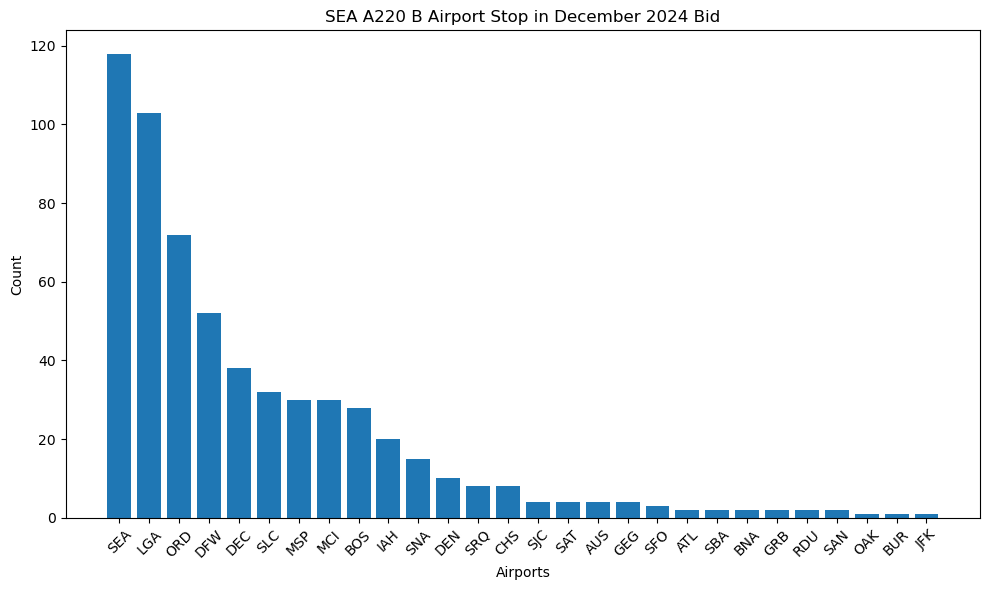

In [21]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(labels, counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('SEA A220 B Airport Stop in December 2024 Bid')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels
# Save the plot
plt.savefig('airport_stops.png')  # Save as a PNG file
plt.show()

In [10]:
# Count instances of each string
skipped_count_summary = Counter(skipped_capitalized_groups)

# Print the summary
print(skipped_count_summary)

Counter({'ORD': 22, 'DFW': 20, 'MCI': 14, 'LGA': 12, 'BOS': 11, 'IAH': 8, 'DEN': 5, 'SRQ': 4, 'SNA': 4, 'MSP': 4, 'CHS': 3, 'SFO': 2, 'SJC': 2, 'SLC': 2, 'GEG': 2, 'SBA': 1, 'RDU': 1, 'BUR': 1, 'JFK': 1})


In [11]:
# Get the counts sorted from highest to lowest
skipped_sorted_counts = skipped_count_summary.most_common()
# Prepare data for plotting
slabels, scounts = zip(*skipped_sorted_counts)  # Unzip the sorted counts into labels and counts

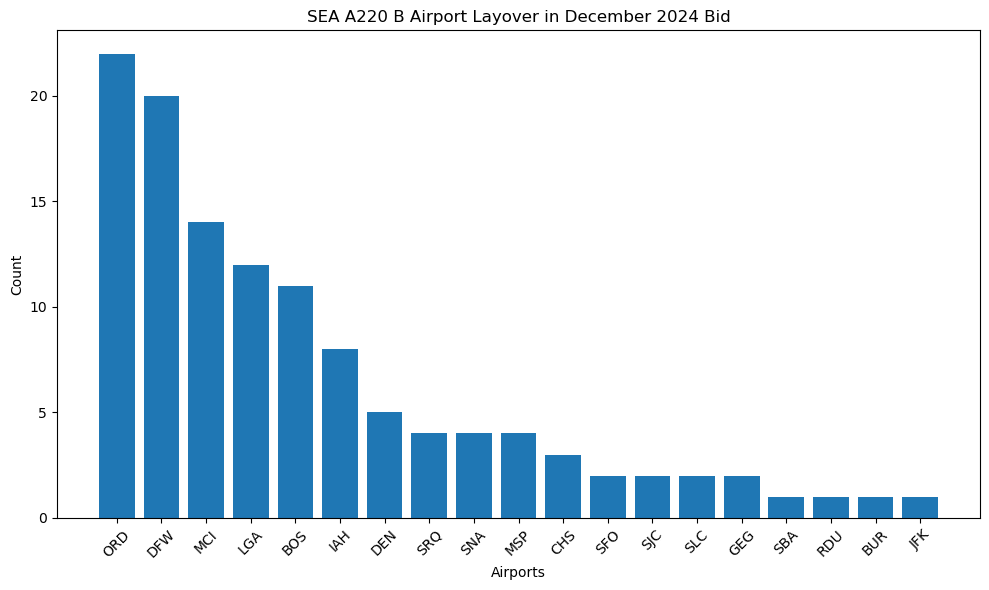

In [19]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(slabels, scounts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('SEA A220 B Airport Layover in December 2024 Bid')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the plot
plt.savefig('airport_layover.png')  # Save as a PNG file
plt.show()

In [23]:
# Load the OpenFlights airports data
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airports_df = pd.read_csv(url, header=None, names=columns)

# Filter for relevant columns (IATA, Latitude, Longitude)
airport_locations = airports_df[['IATA', 'Name', 'Latitude', 'Longitude']]

# Display the first few rows
print(airport_locations.head())

  IATA                                         Name  Latitude   Longitude
0  GKA                               Goroka Airport -6.081690  145.391998
1  MAG                               Madang Airport -5.207080  145.789001
2  HGU                 Mount Hagen Kagamuga Airport -5.826790  144.296005
3  LAE                               Nadzab Airport -6.569803  146.725977
4  POM  Port Moresby Jacksons International Airport -9.443380  147.220001


In [25]:
# Convert custom airports to DataFrame
custom_airports_df = pd.DataFrame(list(count_summary.items()), columns=['IATA', 'Count'])
print(custom_airports_df.head())

  IATA  Count
0  SEA    118
1  DEC     38
2  DEN     10
3  SLC     32
4  DFW     52


In [27]:
# Merge the custom airports with the OpenFlights data to get lat/long
merged_data = pd.merge(custom_airports_df, airport_locations, on='IATA', how='left')
print(merged_data.head())

  IATA  Count                                     Name   Latitude   Longitude
0  SEA    118     Seattle Tacoma International Airport  47.449001 -122.308998
1  DEC     38                          Decatur Airport  39.834599  -88.865700
2  DEN     10             Denver International Airport  39.861698 -104.672997
3  SLC     32     Salt Lake City International Airport  40.788399 -111.977997
4  DFW     52  Dallas Fort Worth International Airport  32.896801  -97.038002


In [29]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
airport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>SEA A220 B Dec 24 Stops Map</b></h3>
             '''
airport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in merged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 5,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(airport_map)

# Save the map to an HTML file
airport_map.save("custom_airport_map.html")

# Display the map
airport_map

In [31]:
# Convert custom airports to DataFrame
scustom_airports_df = pd.DataFrame(list(skipped_count_summary.items()), columns=['IATA', 'Count'])
print(scustom_airports_df.head())

  IATA  Count
0  DEN      5
1  DFW     20
2  LGA     12
3  ORD     22
4  BOS     11


In [33]:
# Merge the custom airports with the OpenFlights data to get lat/long
smerged_data = pd.merge(scustom_airports_df, airport_locations, on='IATA', how='left')
print(smerged_data.head())

  IATA  Count                                               Name   Latitude  \
0  DEN      5                       Denver International Airport  39.861698   
1  DFW     20            Dallas Fort Worth International Airport  32.896801   
2  LGA     12                                 La Guardia Airport  40.777199   
3  ORD     22               Chicago O'Hare International Airport  41.978600   
4  BOS     11  General Edward Lawrence Logan International Ai...  42.364300   

    Longitude  
0 -104.672997  
1  -97.038002  
2  -73.872597  
3  -87.904800  
4  -71.005203  


In [35]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
sairport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>SEA A220 B Dec 24 Layovers Map</b></h3>
             '''
sairport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in smerged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(sairport_map)

# Save the map to an HTML file
sairport_map.save("scustom_airport_map.html")

# Display the map
sairport_map